<a href="https://colab.research.google.com/github/noircir/Time-Series-Air-Quality/blob/master/TimeSeries_AirQuality_DAILY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting ***daily*** maximum Carbon Monoxide (CO) levels

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# separator is ';'
# creating an index out of Date
# recognize date as Date
# decimal=','  -- dataset has European style of floating numbers with comma

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TimeSeries_AirQuality/AirQualityUCI.csv',
                 sep=';',
                 index_col='Date', 
                 parse_dates=True,
                 decimal=',')

# Data exploration

In [39]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-10-03 to NaT
Data columns (total 16 columns):
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(1)
memory usage: 1.2+ MB


In [41]:
df.tail()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [0]:
# Remove columns 'Unnamed 15' and 'Unnamed: 16'
df = df.drop('Unnamed: 15', axis=1)
df = df.drop('Unnamed: 16', axis=1)

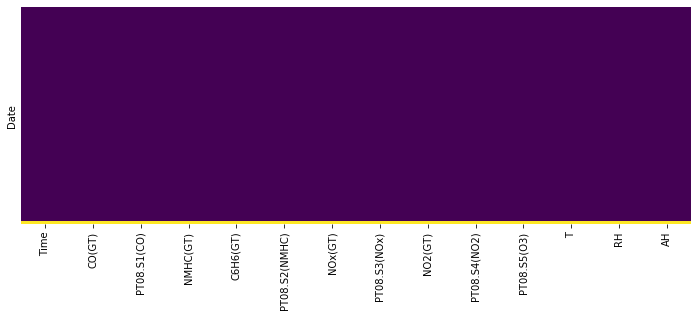

In [43]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [44]:
# drop last empty rows
df['CO(GT)'].isna().sum()

114

In [0]:
df.dropna(subset=['CO(GT)'], axis=0, inplace=True)

In [46]:
df['CO(GT)'].isna().sum()

0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 14 columns):
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [48]:
df.index

DatetimeIndex(['2004-10-03', '2004-10-03', '2004-10-03', '2004-10-03',
               '2004-10-03', '2004-10-03', '2004-11-03', '2004-11-03',
               '2004-11-03', '2004-11-03',
               ...
               '2005-04-04', '2005-04-04', '2005-04-04', '2005-04-04',
               '2005-04-04', '2005-04-04', '2005-04-04', '2005-04-04',
               '2005-04-04', '2005-04-04'],
              dtype='datetime64[ns]', name='Date', length=9357, freq=None)

In [49]:
# See if there are missing dates in the index

missing_dates = pd.date_range(start = df.index.min(), end = df.index.max() ).difference(df.index)
missing_dates

DatetimeIndex(['2004-01-13', '2004-01-14', '2004-01-15', '2004-01-16',
               '2004-01-17', '2004-01-18', '2004-01-19', '2004-01-20',
               '2004-01-21', '2004-01-22',
               ...
               '2005-11-21', '2005-11-22', '2005-11-23', '2005-11-24',
               '2005-11-25', '2005-11-26', '2005-11-27', '2005-11-28',
               '2005-11-29', '2005-11-30'],
              dtype='datetime64[ns]', length=309, freq=None)

In [50]:
len(missing_dates)

309

In [51]:
# To fill in the missing dates with pandas' "reindex"
# First, create a CO series:

s = df['CO(GT)']
s.head()

Date
2004-10-03    2.6
2004-10-03    2.0
2004-10-03    2.2
2004-10-03    2.2
2004-10-03    1.6
Name: CO(GT), dtype: float64

In [0]:
s = s.reindex(s.index, fill_value=np.nan)

In [53]:
missing_dates = pd.date_range(start = s.index.min(), end = s.index.max() ).difference(s.index)
missing_dates

DatetimeIndex(['2004-01-13', '2004-01-14', '2004-01-15', '2004-01-16',
               '2004-01-17', '2004-01-18', '2004-01-19', '2004-01-20',
               '2004-01-21', '2004-01-22',
               ...
               '2005-11-21', '2005-11-22', '2005-11-23', '2005-11-24',
               '2005-11-25', '2005-11-26', '2005-11-27', '2005-11-28',
               '2005-11-29', '2005-11-30'],
              dtype='datetime64[ns]', length=309, freq=None)

# Missing CO values

In [0]:
title = 'Title'
xlabel = 'X label'
ylabel = 'Y label'

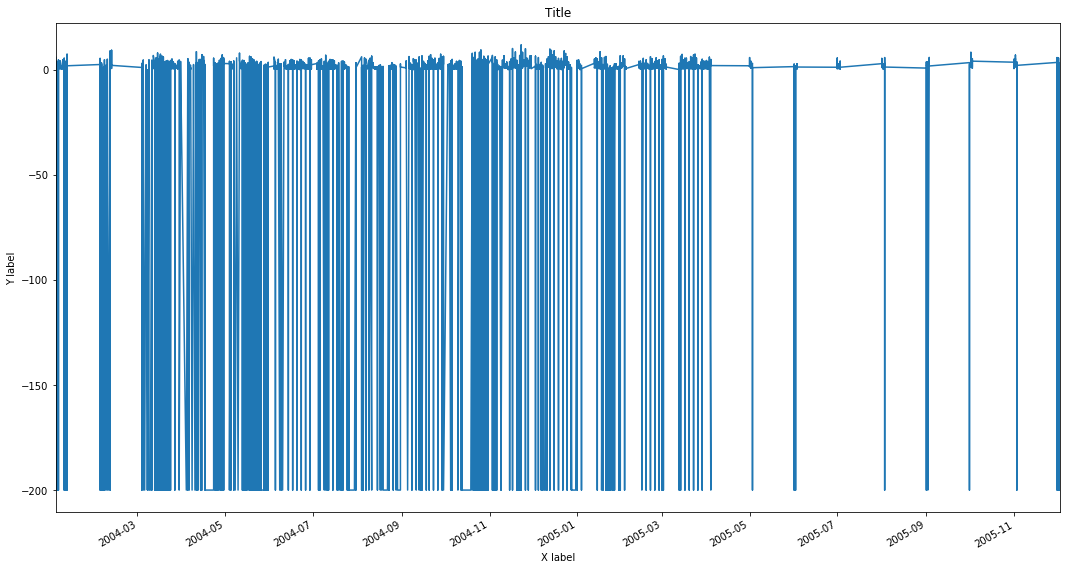

In [55]:
ax = s.plot(figsize=(18,10),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [56]:
# "-200" designates a missing value

df['CO(GT)'].min()

-200.0

In [57]:
missing_values = len(df[df['CO(GT)'] == -200])
missing_values

1683

In [58]:
total_values = len(df['CO(GT)'])
total_values

9357

In [59]:
print("Percentage of missing values: {}".format(missing_values/total_values * 100))

Percentage of missing values: 17.986534145559474


In [0]:
# Because only 17% ov values are missing for carbon monoxyde, we will replace 
# the missing values with mean of values of nearby hours. 

# At first, replace "-200" with NaN:

df['CO(GT)'].replace(-200, np.nan,inplace=True)

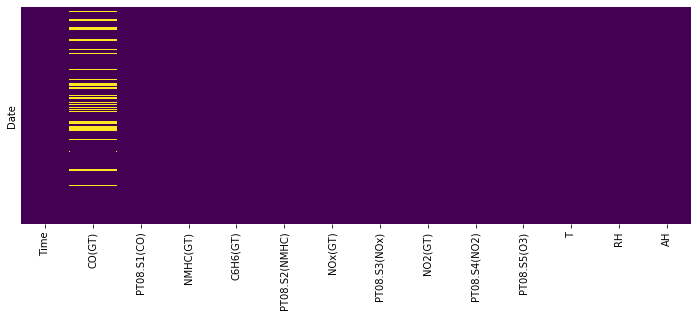

In [61]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Replace missing values with a monthly average for that particular hour

In [62]:
# create an 'Hour' column by splitting the 'Time' column

df['Hour'] = df['Time'].apply(lambda x: int(x.split('.')[0]))
df['Hour'].head()

Date
2004-10-03    18
2004-10-03    19
2004-10-03    20
2004-10-03    21
2004-10-03    22
Name: Hour, dtype: int64

In [63]:
# create a 'Month' column (needed to group with Hour)

df['Month']=df.index.month
df['Month'].head()

Date
2004-10-03    10
2004-10-03    10
2004-10-03    10
2004-10-03    10
2004-10-03    10
Name: Month, dtype: int64

In [64]:
df2 = df.groupby(['Month','Hour'])
cols = ['Month','Hour','CO(GT)']
df2[cols].head()

,Month,Hour,CO(GT)
Date,,,
2004-10-03,10,18,2.6
2004-10-03,10,19,2.0
2004-10-03,10,20,2.2
2004-10-03,10,21,2.2
2004-10-03,10,22,1.6
...,...,...,...
2004-10-08,10,13,0.9
2004-10-08,10,14,1.0
2004-10-08,10,15,1.1


In [65]:
df.groupby(['Month','Hour'])['CO(GT)'].mean().head()

Month  Hour
1      0       1.764286
       1       1.540741
       2       1.164286
       3       1.036000
       4       0.770588
Name: CO(GT), dtype: float64

In [0]:
# Fill the NaNs with the average of the group (Month and Hour)
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))

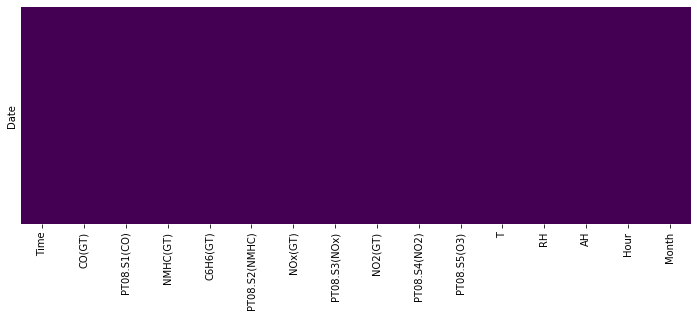

In [67]:
# Check for missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [68]:
# Check again
nulls = pd.isnull(df['CO(GT)'])
df[nulls]

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
Date,,,,,,,,,,,,,,,,


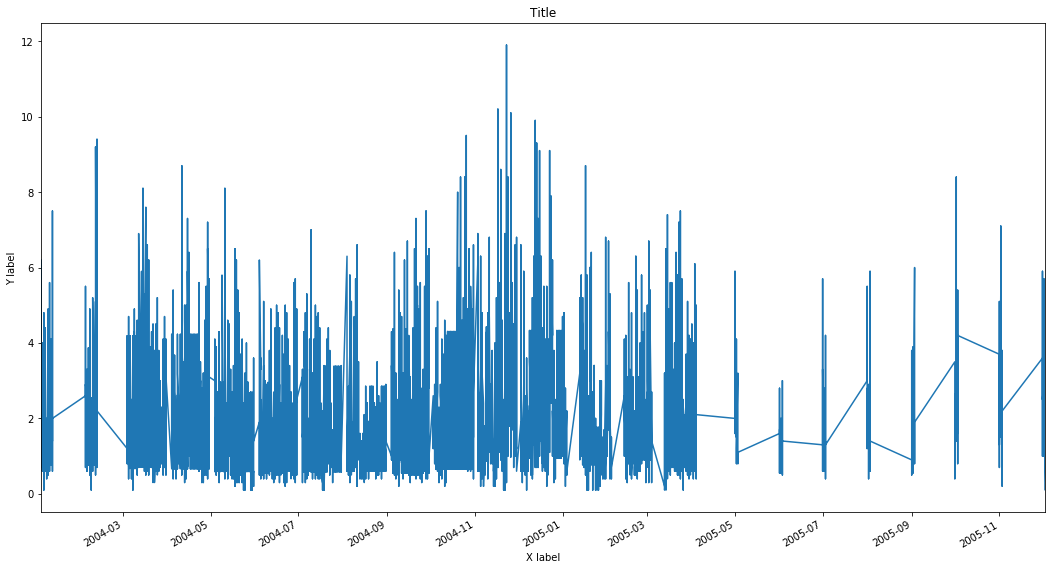

In [69]:
ax = df['CO(GT)'].plot(figsize=(18,10),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
# df[['AH','RH','CO(GT)']].plot(figsize=(18,8)).autoscale(axis='x',tight=True);

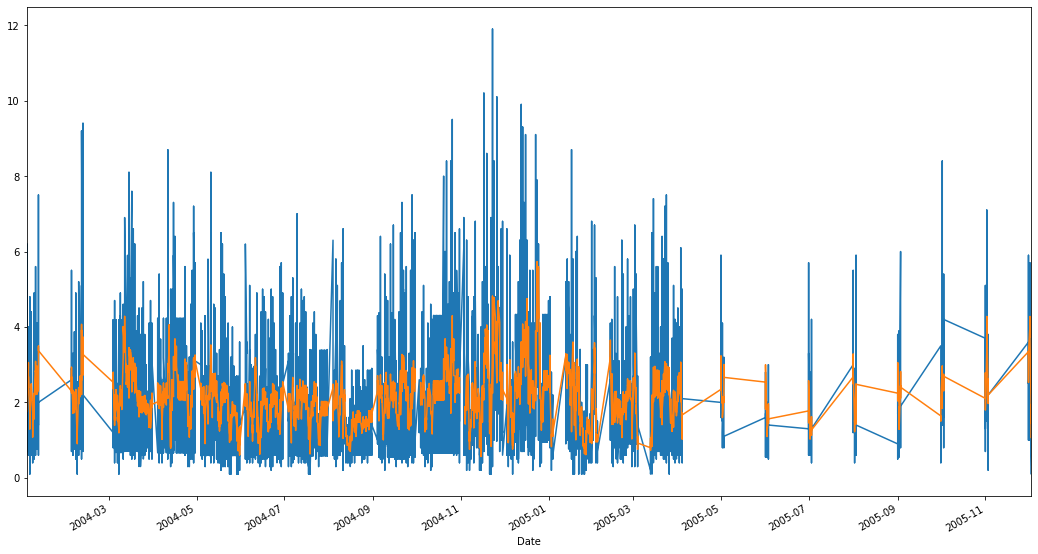

In [70]:
df['CO(GT)'].plot(figsize=(18,10)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['CO(GT)'].plot();

In [0]:
sub_df = df['2005-04-01':'2005-05-01']

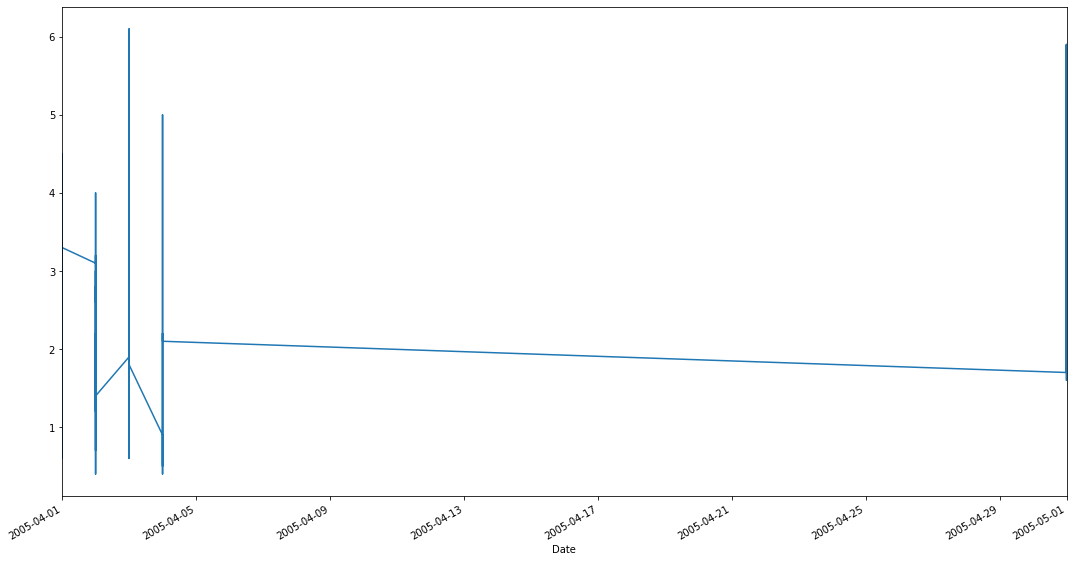

In [72]:
sub_df['CO(GT)'].plot(figsize=(18,10)).autoscale(axis='x',tight=True)

In [0]:
# The straight lines mean those dates are not present. 
# df['2005-04-04':'2005-05-01']

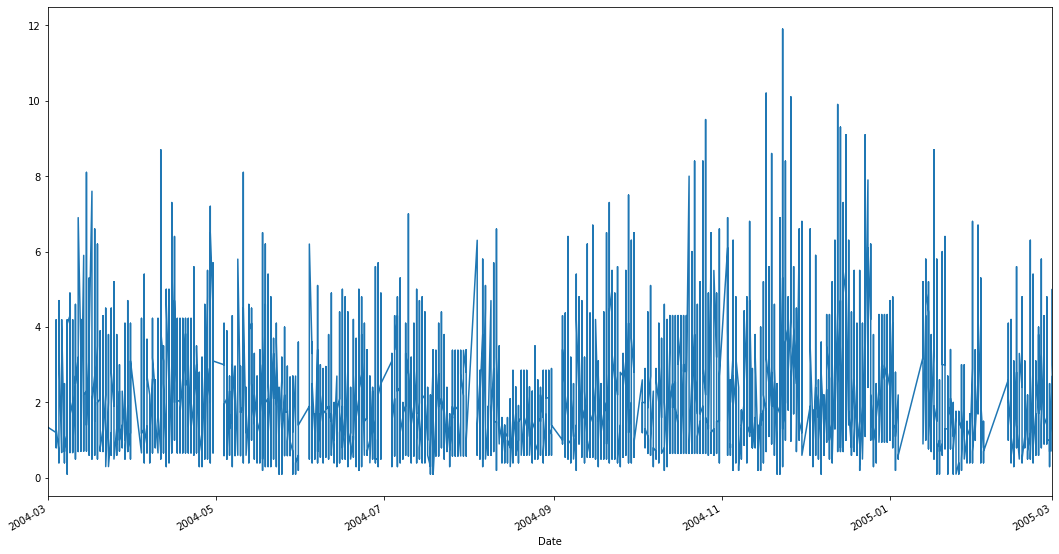

In [74]:
# middle portion
df['CO(GT)'].plot(xlim=['2004-03-01','2005-03-01'],figsize=(18,10));

In [0]:
# To deal with missing dates (horizontal lines): https://bit.ly/2S0f43e, https://bit.ly/2swgiZq 
# Create missing dates, fill the values with NaN, and re-index

df = df.reindex(pd.DatetimeIndex(df.index), fill_value=np.nan)

In [77]:
df.index

DatetimeIndex(['2004-10-03', '2004-10-03', '2004-10-03', '2004-10-03',
               '2004-10-03', '2004-10-03', '2004-11-03', '2004-11-03',
               '2004-11-03', '2004-11-03',
               ...
               '2005-04-04', '2005-04-04', '2005-04-04', '2005-04-04',
               '2005-04-04', '2005-04-04', '2005-04-04', '2005-04-04',
               '2005-04-04', '2005-04-04'],
              dtype='datetime64[ns]', name='Date', length=9357, freq=None)

In [0]:
df = df.reindex(labels=df.index)

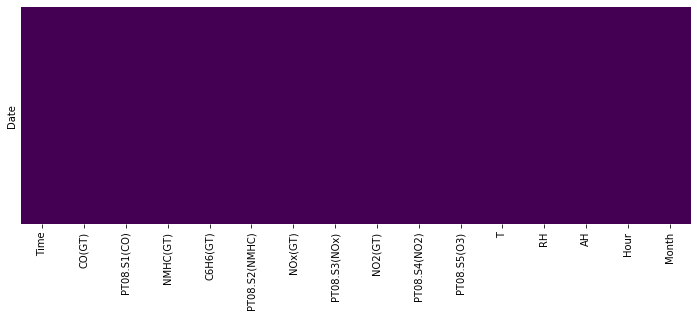

In [79]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

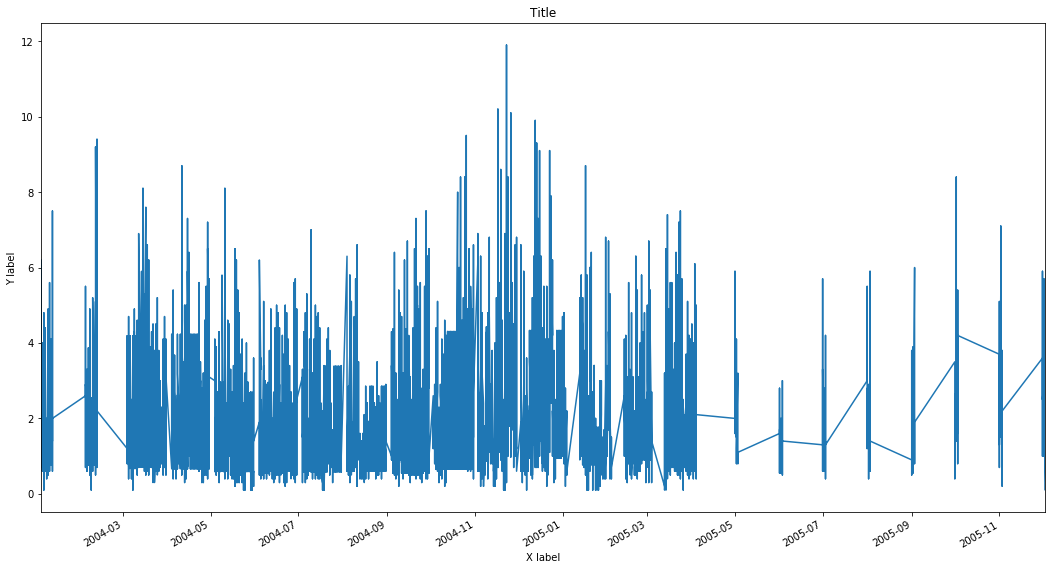

In [80]:
ax = df['CO(GT)'].plot(figsize=(18,10),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [0]:
# s = s.reindex(idx, fill_value=0)